<a class="anchor" id="0.1"></a>
# **Table of Contents**

*  [Import Libraries & Files](0.2)
1. [Line Chart](#1)
2. [Scatter Plot](#2)
3. [Rel Plot](#3)
4. [Bar Plot](#4)
5. [Count Plot](#5)
6. [Cat Plot](#6)
7. [Dist Plot](#7)
8. [KDE Plot](#8)
9. [Swarm Plot](#9)
10. [Strip Plot](#10)
11. [Box Plot](#11)
12. [Pair Plot](#12)
13. [Reg Plot](#13)
14. [Joint Plot](#14)
15. [Heat Map](#15)


# **Import Libraries & Files**  <a class="anchor" id="0.2"></a>

In [1]:
import requests
import os
import zipfile
import tarfile

# 1. Download (If needed)
url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"
filename = "Yelp-JSON.zip"

if not os.path.exists(filename) and not os.path.exists('yelp_academic_dataset_business.json'):
    print(f"Downloading {filename}...")
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, stream=True, headers=headers)
    with open(filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Downloaded successfully.")
else:
    print("File already exists or downloaded.")

# 2. Extract ZIP (Pythonic way)
if os.path.exists(filename):
    print("Extracting ZIP...")
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("ZIP Extracted.")

# 3. Extract TAR (Pythonic way)
tar_path = "Yelp JSON/yelp_dataset.tar"
if os.path.exists(tar_path):
    print("Extracting TAR...")
    try:
        with tarfile.open(tar_path, "r") as tar:
            tar.extractall()
        print("TAR Extracted.")
    except Exception as e:
        print(f"Tar extraction skipped or error: {e}")
elif os.path.exists("yelp_dataset.tar"):
    with tarfile.open("yelp_dataset.tar", "r") as tar:
        tar.extractall()
    print("TAR Extracted (root).")

Downloaded successfully.
Extracting ZIP...
ZIP Extracted.
Extracting TAR...


/tmp/ipython-input-1557165190.py:34: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


TAR Extracted.


In [29]:
import os
import requests
import zipfile

filename = "Yelp-JSON.zip"

# 1. Remove previous corrupted file (if it exists)
if os.path.exists(filename):
    try:
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            if zip_ref.testzip() is not None:
                raise zipfile.BadZipFile
        print("Zip file is valid.")
    except Exception:
        print("Corrupted zip file detected. Deleting and re-downloading...")
        os.remove(filename)

# 2. Re-download (only if the file does not exist)
if not os.path.exists(filename):
    print(f"Downloading {filename}...")
    url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"

    # Header to prevent being blocked by the server
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        response = requests.get(url, stream=True, headers=headers)
        response.raise_for_status() # Check for HTTP errors

        # Save the file
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print("Download completed successfully.")
    except Exception as e:
        print(f"Download error: {e}")

# 3. Attempt extraction
if os.path.exists(filename):
    try:
        print("Extracting ZIP...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(".")
        print("ZIP Extracted Successfully!")
    except zipfile.BadZipFile:
        print("❌ Error: The downloaded file is still corrupted. The download link may have expired.")

Zip file is valid.
Extracting ZIP...
ZIP Extracted Successfully!


In [3]:
import pandas as pd
import os
import random
import io

# Redefine the paths to the JSON files (assuming they are in the current directory)
business_file = 'yelp_academic_dataset_business.json'
review_file = 'yelp_academic_dataset_review.json'
user_file = 'yelp_academic_dataset_user.json'

# Define sampling rates
sample_rate_business = 0.50 # 50% for business file
sample_rate_large = 0.10    # 10% for review and user files

# --- Re-Sample and Load DataFrames ---
if os.path.exists(business_file):
    print(f"Re-sampling and loading {business_file} with rate {sample_rate_business*100}%...")
    sampled_business_lines = []
    with open(business_file, 'r', encoding='utf-8') as f:
        for line in f:
            if random.random() < sample_rate_business:
                sampled_business_lines.append(line)
    df_business_sampled = pd.read_json(io.StringIO(''.join(sampled_business_lines)), lines=True)
    print("df_business_sampled shape:", df_business_sampled.shape)
else:
    print(f"ERROR: {business_file} not found. Please check extraction step.")

if os.path.exists(review_file):
    print(f"Re-sampling and loading {review_file} with rate {sample_rate_large*100}%...")
    sampled_review_lines = []
    with open(review_file, 'r', encoding='utf-8') as f:
        for line in f:
            if random.random() < sample_rate_large:
                sampled_review_lines.append(line)
    df_review_sampled = pd.read_json(io.StringIO(''.join(sampled_review_lines)), lines=True)
    print("df_review_sampled shape:", df_review_sampled.shape)
else:
    print(f"ERROR: {review_file} not found.")

if os.path.exists(user_file):
    print(f"Re-sampling and loading {user_file} with rate {sample_rate_large*100}%...")
    sampled_user_lines = []
    with open(user_file, 'r', encoding='utf-8') as f:
        for line in f:
            if random.random() < sample_rate_large:
                sampled_user_lines.append(line)
    df_user_sampled = pd.read_json(io.StringIO(''.join(sampled_user_lines)), lines=True)
    print("df_user_sampled shape:", df_user_sampled.shape)
else:
    print(f"ERROR: {user_file} not found.")

print("Data Loading Complete.")

Re-sampling and loading yelp_academic_dataset_business.json with rate 50.0%...
df_business_sampled shape: (75149, 14)
Re-sampling and loading yelp_academic_dataset_review.json with rate 10.0%...
df_review_sampled shape: (698205, 9)
Re-sampling and loading yelp_academic_dataset_user.json with rate 10.0%...
df_user_sampled shape: (198536, 22)
Data Loading Complete.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# **Scenario 1: Line Chart**  <a class="anchor" id="1"></a>

Line Chart - Trend of User Activity This visualizes the volume of reviews posted over time (aggregated by month). It helps identify growth trends, seasonality, or changes in user engagement on the platform.

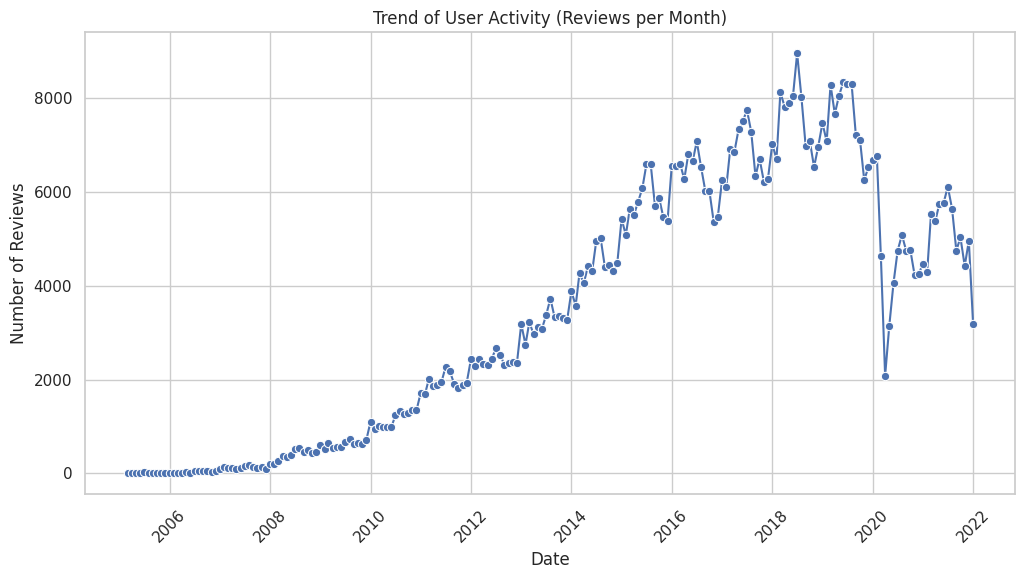

In [6]:
if 'df_review_sampled' in locals():
    df_review_sampled['date'] = pd.to_datetime(df_review_sampled['date'])
    monthly_counts = df_review_sampled.groupby(df_review_sampled['date'].dt.to_period('M')).size()
    monthly_counts.index = monthly_counts.index.to_timestamp()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
    plt.title('Trend of User Activity (Reviews per Month)')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Error: Dataframe not loaded.")

# **Scenario 2: Scatter Plot**  <a class="anchor" id="2"></a>

Scatter Plot - Popularity vs. Quality This examines the relationship between a business's review count (popularity) and its average star rating (quality). It reveals whether popular places tend to have higher or lower ratings.

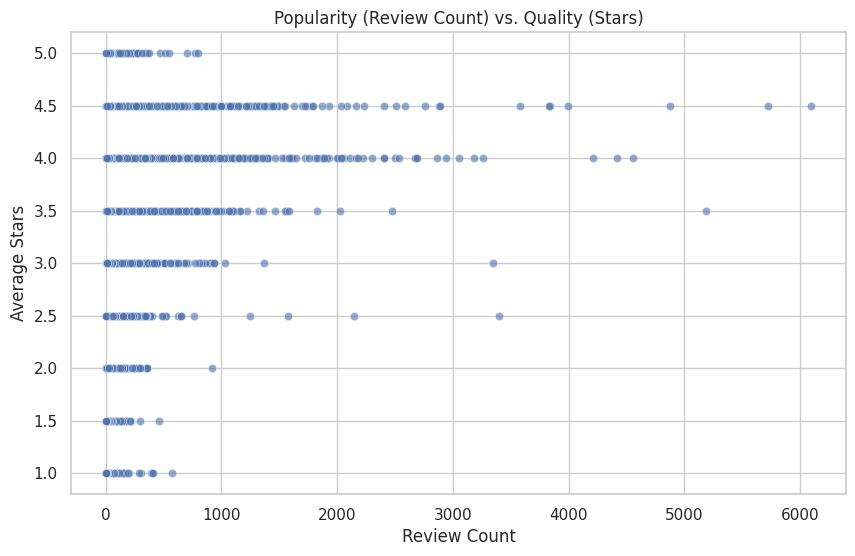

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_business_sampled, x='review_count', y='stars', alpha=0.6, color='b')
plt.title('Popularity (Review Count) vs. Quality (Stars)')
plt.xlabel('Review Count')
plt.ylabel('Average Stars')
plt.show()

# **Scenario 3: Rel Plot**  <a class="anchor" id="3"></a>

Rel Plot - City Comparison This compares the popularity-quality relationship across two major cities using side-by-side subplots. It highlights regional differences in business performance and user rating behaviors.

Analysis for cities: ['Philadelphia', 'Tampa']


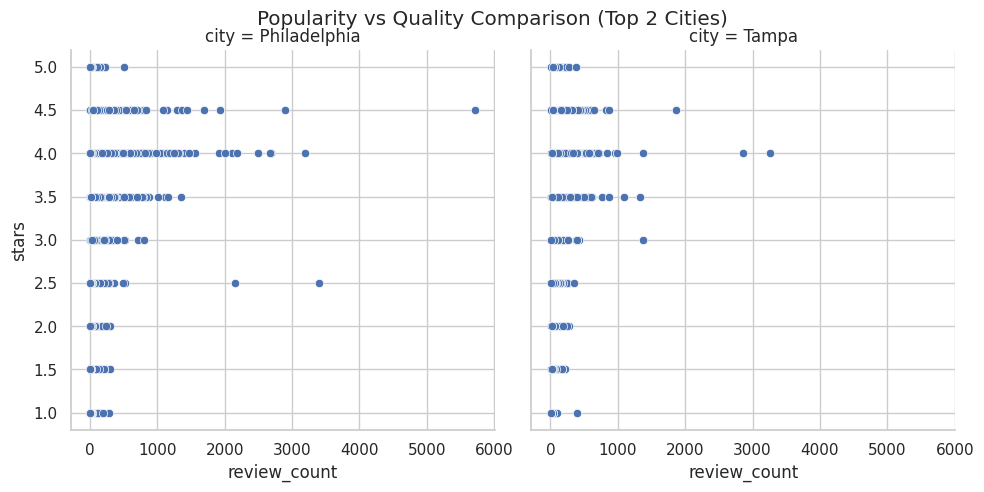

In [34]:
df_business_sampled.columns = df_business_sampled.columns.str.strip()

if 'city' not in df_business_sampled.columns:
    print("❌ Error: 'city' column not found in the DataFrame!")
    print("Available columns:", list(df_business_sampled.columns))
else:
    top_cities = df_business_sampled['city'].value_counts().head(2).index.tolist()

    if len(top_cities) < 2:
        print("⚠️ Warning: The number of cities in the dataset is less than 2.")
    else:
        print(f"Analysis for cities: {top_cities}")

        df_cities = df_business_sampled[df_business_sampled['city'].isin(top_cities)]

        g = sns.relplot(
            data=df_cities, x='review_count', y='stars',
            col='city', kind='scatter', height=5, aspect=1
        )
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle('Popularity vs Quality Comparison (Top 2 Cities)')
        plt.show()

# **Scenario 4: Bar Plot**  <a class="anchor" id="4"></a>

Bar Plot - Quality by Price This investigates the correlation between price levels (1 to 4 dollar signs) and average star ratings. It helps determine if more expensive restaurants generally achieve higher customer satisfaction.

/tmp/ipython-input-2683605360.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_business_sampled, x='price_level', y='stars', palette='viridis')


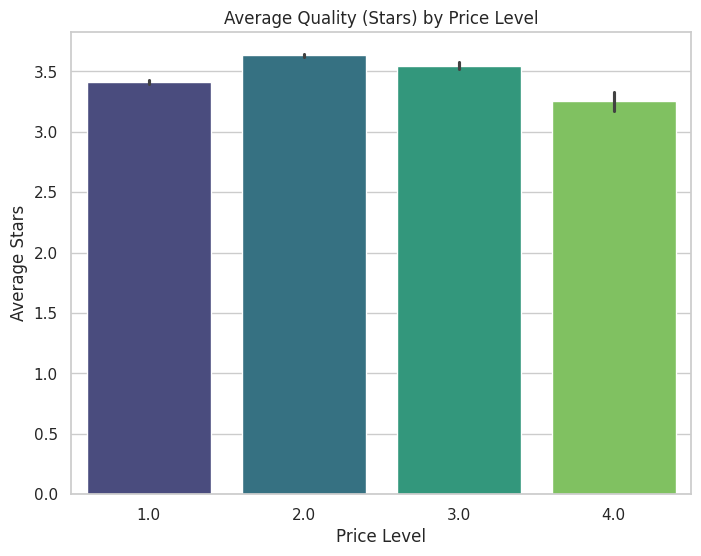

In [11]:
def get_price_level(attr):
    if attr and 'RestaurantsPriceRange2' in attr:
        val = attr['RestaurantsPriceRange2']
        if val in ['1', '2', '3', '4']:
            return int(val)
    return None

df_business_sampled['price_level'] = df_business_sampled['attributes'].apply(get_price_level)

plt.figure(figsize=(8, 6))
sns.barplot(data=df_business_sampled, x='price_level', y='stars', palette='viridis')
plt.title('Average Quality (Stars) by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Average Stars')
plt.show()

# **Scenario 5: Count Plot**  <a class="anchor" id="5"></a>

Count Plot - Distribution of User Ratings This shows the frequency of each star rating (1 to 5) across the entire dataset. It reveals the overall sentiment of the platform (e.g., whether users are mostly positive or critical).

/tmp/ipython-input-3657367366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_review_sampled, x='stars', palette='magma')


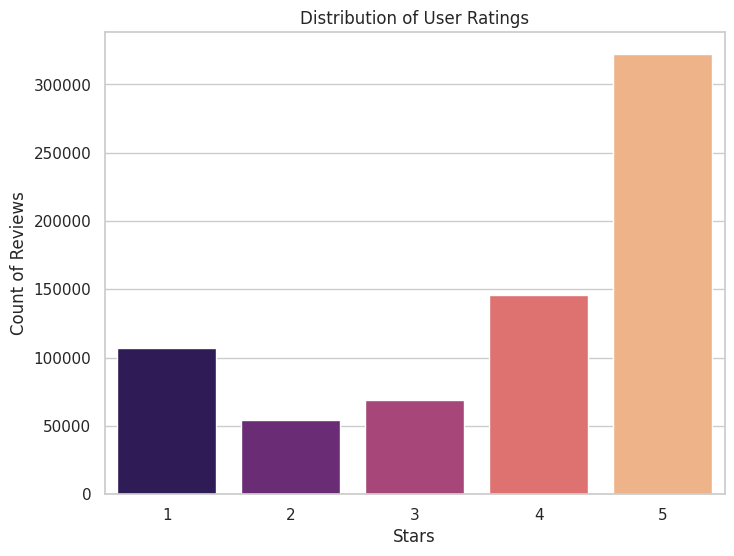

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_review_sampled, x='stars', palette='magma')
plt.title('Distribution of User Ratings')
plt.xlabel('Stars')
plt.ylabel('Count of Reviews')
plt.show()

# **Scenario 6: Cat Plot**  <a class="anchor" id="6"></a>

Cat Plot - Ratings by Cuisine This compares the distribution of star ratings across specific food categories (e.g., Italian, Mexican, Chinese). It allows you to see which cuisines tend to be rated more favorably.

/tmp/ipython-input-1645305240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df_cuisines, x='stars', col='Cuisine Type', kind='count', palette='Set2', height=4, aspect=0.8)


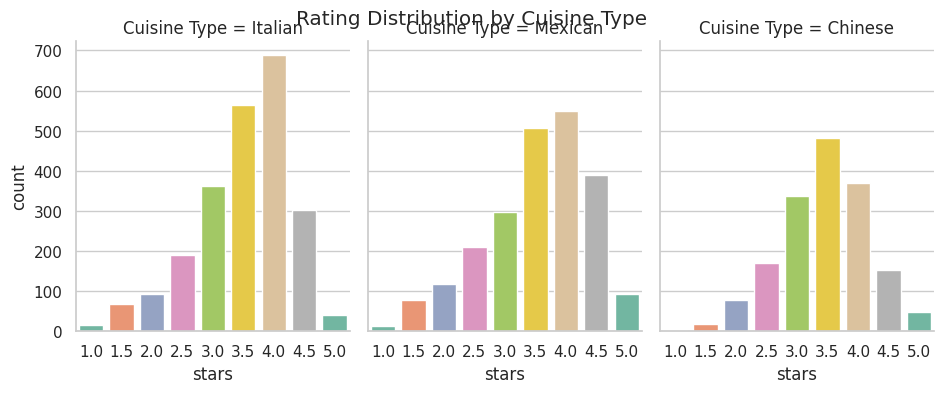

In [13]:
cuisines = ['Italian', 'Mexican', 'Chinese']
df_list = []

for cuisine in cuisines:
    temp = df_business_sampled[df_business_sampled['categories'].str.contains(cuisine, na=False)].copy()
    temp['Cuisine Type'] = cuisine
    df_list.append(temp)

df_cuisines = pd.concat(df_list)

sns.catplot(data=df_cuisines, x='stars', col='Cuisine Type', kind='count', palette='Set2', height=4, aspect=0.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Rating Distribution by Cuisine Type')
plt.show()

# **Scenario 7: Dist Plot**  <a class="anchor" id="7"></a>

Dist Plot (Histplot) - User Activity Distribution This histogram displays how many reviews most users write. It typically reveals a "power law" distribution, where most users write few reviews, and a few "super users" write many.

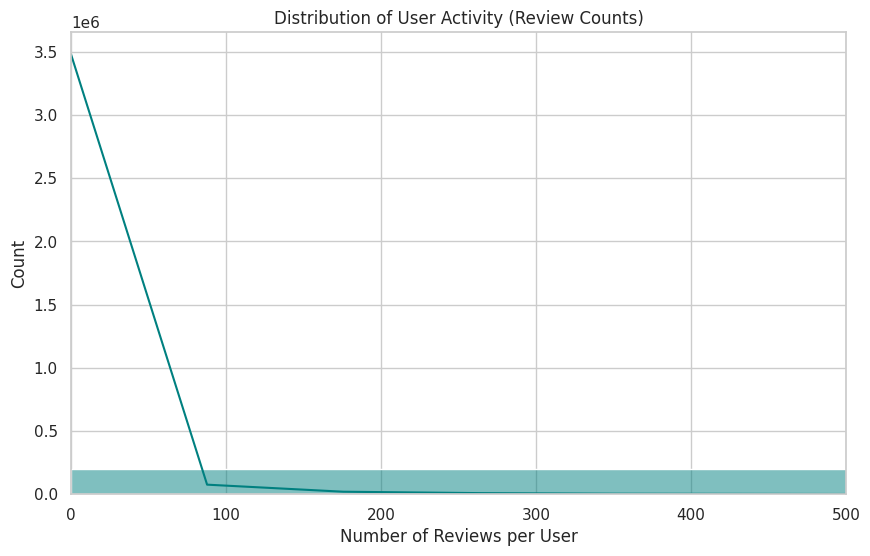

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_user_sampled['review_count'], kde=True, bins=30, color='teal')
plt.title('Distribution of User Activity (Review Counts)')
plt.xlabel('Number of Reviews per User')
plt.xlim(0, 500)
plt.show()

# **Scenario 8: KDE Plot**  <a class="anchor" id="8"></a>

KDE Plot - Business Star Density This provides a smooth probability density curve for business ratings. It is useful for visualizing the "shape" of the data to see where the majority of business ratings cluster.

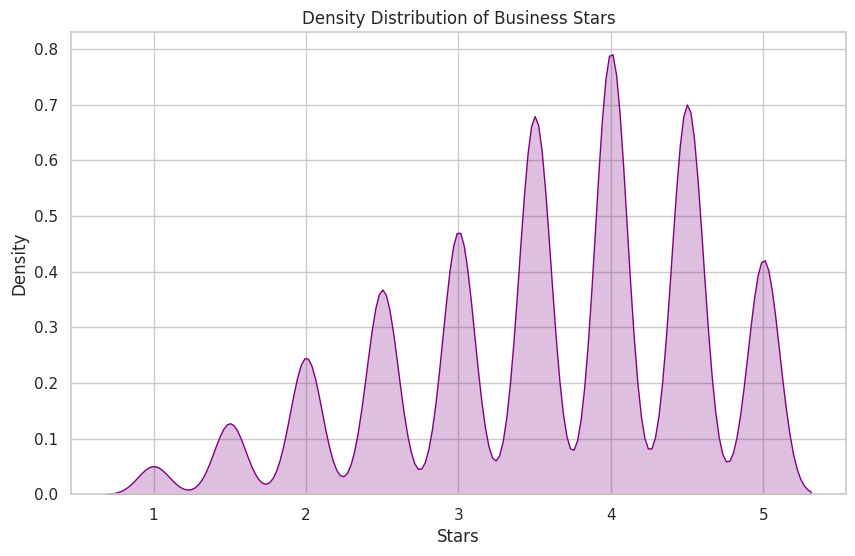

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_business_sampled['stars'], fill=True, color='purple')
plt.title('Density Distribution of Business Stars')
plt.xlabel('Stars')
plt.show()

# **Scenario 9: Swarm Plot**  <a class="anchor" id="9"></a>

Swarm Plot - Ratings by Business Category This displays individual data points for ratings across categories without overlapping. It gives a detailed view of the data density and spread for sectors like Hotels vs. Restaurants.

/tmp/ipython-input-1108746165.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_categories, x='Category', y='stars', palette='deep', size=3)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


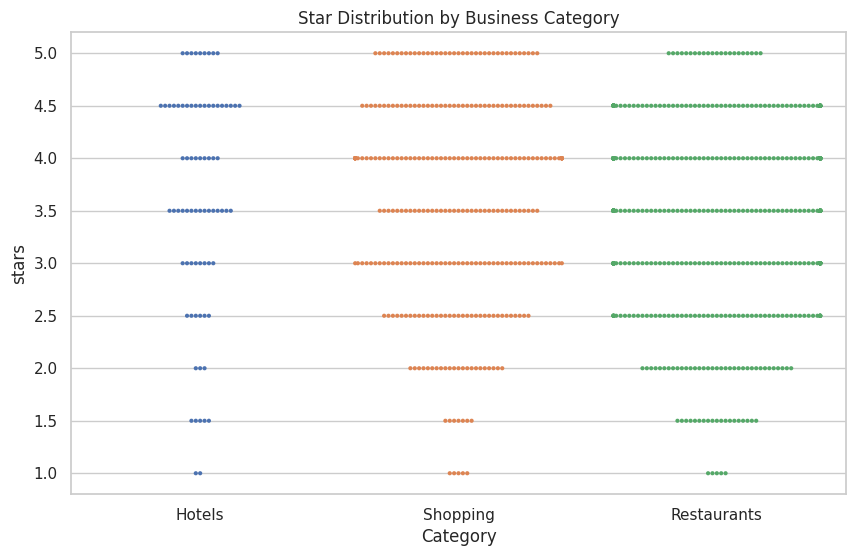

In [16]:
categories = ['Restaurants', 'Shopping', 'Hotels']
df_cat_list = []

for cat in categories:
    temp = df_business_sampled[df_business_sampled['categories'].str.contains(cat, na=False)].copy()
    temp['Category'] = cat
    df_cat_list.append(temp)

df_categories = pd.concat(df_cat_list)
if len(df_categories) > 1000:
    df_categories = df_categories.sample(1000)

plt.figure(figsize=(10, 6))
sns.swarmplot(data=df_categories, x='Category', y='stars', palette='deep', size=3)
plt.title('Star Distribution by Business Category')
plt.show()

# **Scenario 10: Strip Plot**  <a class="anchor" id="10"></a>

Strip Plot - Ratings by Postal Code This visualizes the spread of ratings across the most active postal codes in a specific city. It helps identify which neighborhoods or geographic areas tend to have better-rated businesses.

Most frequent city selected for analysis: Philadelphia
Number of data points to plot: 4090


/tmp/ipython-input-679867571.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


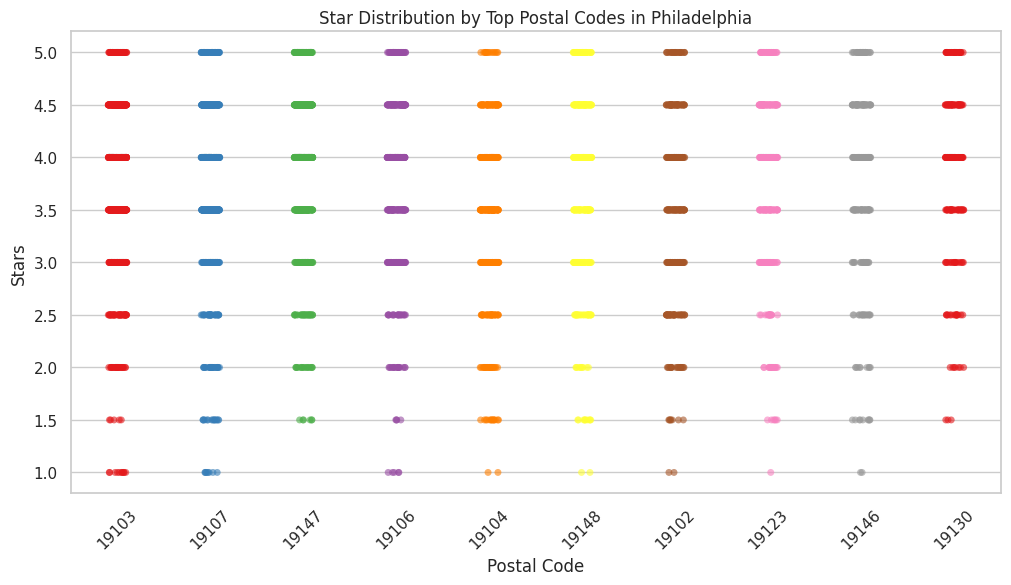

In [35]:
df_business_sampled['city'] = df_business_sampled['city'].astype(str).str.strip()
df_business_sampled['postal_code'] = df_business_sampled['postal_code'].astype(str).str.strip()

top_city = df_business_sampled['city'].value_counts().idxmax()
print(f"Most frequent city selected for analysis: {top_city}")

city_df = df_business_sampled[df_business_sampled['city'] == top_city]

top_zips = city_df['postal_code'].value_counts().head(10).index.tolist()
top_zips = [z for z in top_zips if z != '']

if not top_zips:
    print("❌ Error: No valid postal codes found for this city.")
else:
    df_zip = city_df[city_df['postal_code'].isin(top_zips)]

    if df_zip.empty:
        print("❌ Error: Final DataFrame for plotting is empty.")
    else:
        print(f"Number of data points to plot: {len(df_zip)}")

        plt.figure(figsize=(12, 6))
        sns.stripplot(
            data=df_zip,
            x='postal_code',
            y='stars',
            jitter=True,
            palette='Set1',
            alpha=0.6,
            order=top_zips
        )
        plt.title(f'Star Distribution by Top Postal Codes in {top_city}')
        plt.xlabel('Postal Code')
        plt.ylabel('Stars')
        plt.xticks(rotation=45)
        plt.show()

# **Scenario 11: Box Plot**  <a class="anchor" id="11"></a>

Box Plot - Popularity Distribution This compares the statistical summary (median, quartiles, and outliers) of review counts across business categories. It highlights which industries attract the most volume and extreme outliers.

/tmp/ipython-input-1346487911.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='Category', y='review_count', palette='Pastel1')


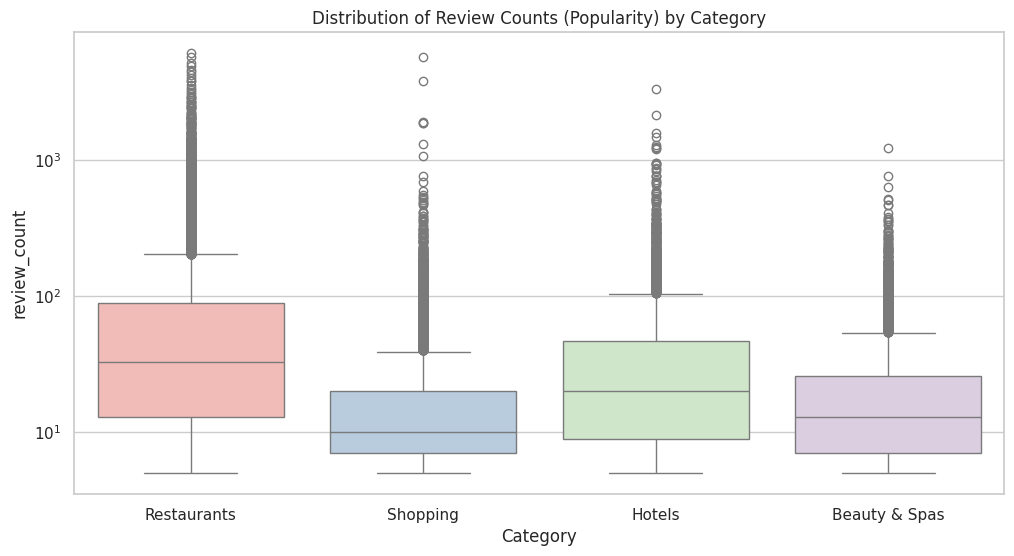

In [18]:
categories = ['Restaurants', 'Shopping', 'Hotels', 'Beauty & Spas']
df_box_list = []

for cat in categories:
    temp = df_business_sampled[df_business_sampled['categories'].str.contains(cat, na=False)].copy()
    temp['Category'] = cat
    df_box_list.append(temp)

df_box = pd.concat(df_box_list)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, x='Category', y='review_count', palette='Pastel1')
plt.title('Distribution of Review Counts (Popularity) by Category')
plt.yscale('log')
plt.show()

# **Scenario 12: Pair Plot**  <a class="anchor" id="12"></a>

Pair Plot - User Variable Relationships This creates a matrix of scatter plots and histograms for multiple user variables (e.g., useful votes, fans). It provides a quick overview of how these variables correlate with one another.

⚠️ Data size (198536) is large. For speed, only 2000 random samples are plotted.


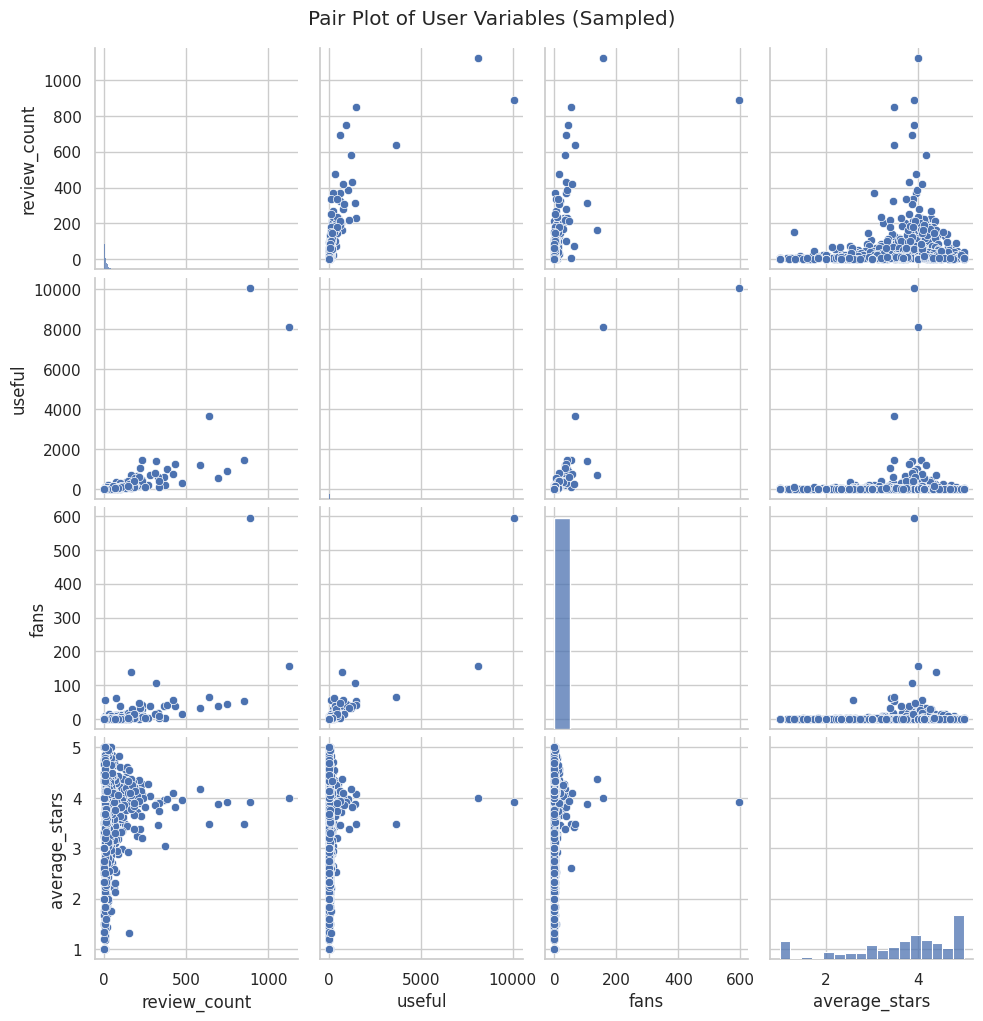

In [36]:
user_vars = ['review_count', 'useful', 'fans', 'average_stars']

if all(col in df_user_sampled.columns for col in user_vars):

    if len(df_user_sampled) > 2000:
        print(f"⚠️ Data size ({len(df_user_sampled)}) is large. For speed, only 2000 random samples are plotted.")
        df_plot = df_user_sampled[user_vars].sample(n=2000, random_state=42)
    else:
        df_plot = df_user_sampled[user_vars]

    sns.pairplot(df_plot)
    plt.suptitle('Pair Plot of User Variables (Sampled)', y=1.02)
    plt.show()

else:
    print("❌ Error: One of the target columns was not found in the DataFrame.")

# **Scenario 13: Reg Plot**  <a class="anchor" id="13"></a>

Reg Plot - Linear Relationship This fits a linear regression line to the scatter plot of review counts vs. stars. It helps visually confirm if there is a positive or negative trend between popularity and quality.

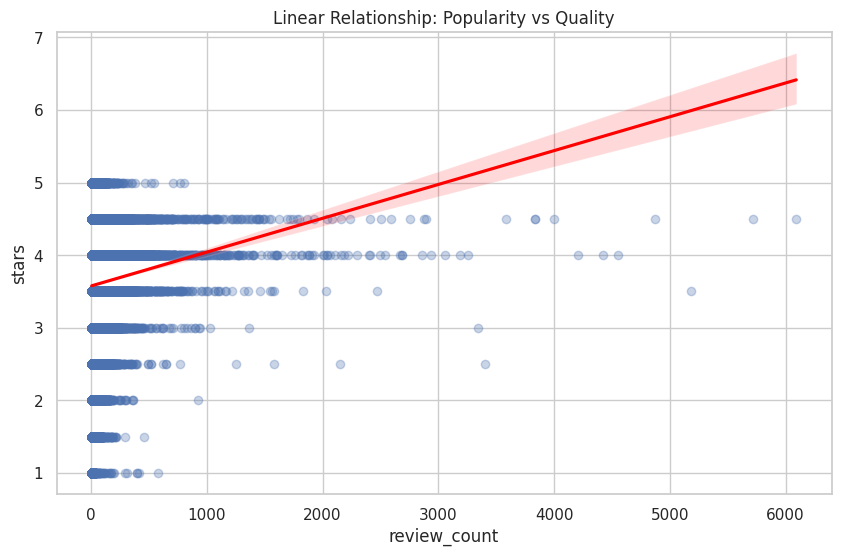

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_business_sampled, x='review_count', y='stars',
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Linear Relationship: Popularity vs Quality')
plt.show()

# **Scenario 14: Joint Plot**  <a class="anchor" id="14"></a>

Joint Plot - Bivariate and Univariate Analysis This combines a scatter plot in the center with histograms on the margins. It allows you to analyze the relationship between two variables while seeing their individual distributions simultaneously.

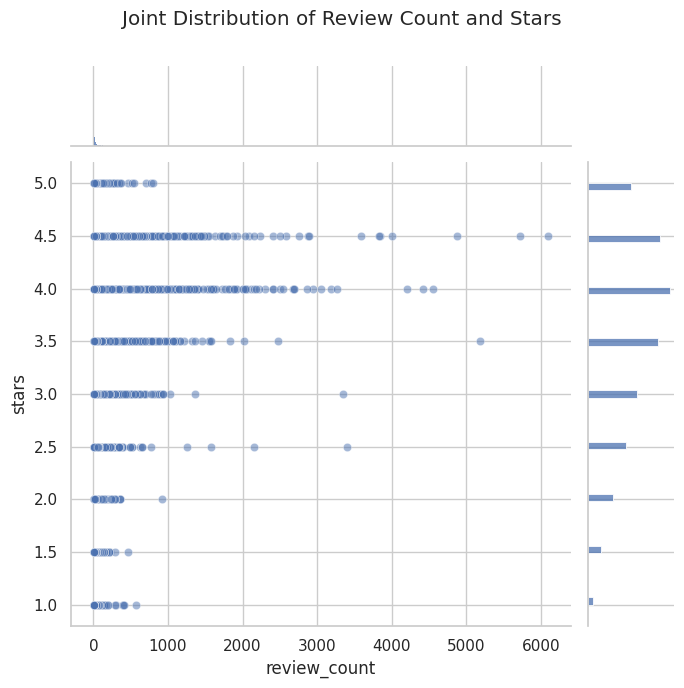

In [22]:
sns.jointplot(data=df_business_sampled, x='review_count', y='stars', kind='scatter', alpha=0.5, height=7)
plt.subplots_adjust(top=0.9)
plt.suptitle('Joint Distribution of Review Count and Stars')
plt.show()

# **Scenario 15: Heat Map**  <a class="anchor" id="15"></a>

Heat Map - Correlation Matrix This uses color intensity to represent the correlation coefficients between user variables. It is the fastest way to spot strong positive or negative relationships between numerical features.

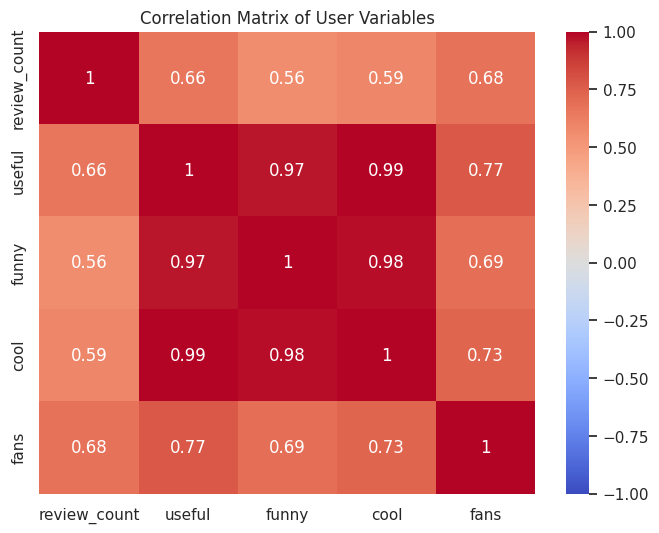

In [23]:
corr_vars = ['review_count', 'useful', 'funny', 'cool', 'fans']
corr_matrix = df_user_sampled[corr_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of User Variables')
plt.show()